# Applied Machine Learning: Assignment \#5

### Sheetal Parikh
EN.605.631.81<br>
March 1, 2021
***
***

## Problem 1
*Preprocess the data, impute missing values as you see fit, and remove features that you see useless.*

### Importing Data and Initial Observations

In [1]:
# imports for notebook
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns; sns.set(style="ticks", color_codes=True)
from sklearn.model_selection import KFold, StratifiedKFold, cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn import datasets, svm, metrics
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
import os 

#checking current directory
#print(os.getcwd() + "\n")

# change the current directory 
# to specified directory 
os.chdir(r"C:\Users\Sheetal\Documents\Sheetal") 

#Read in files
relative_path_train = 'datasets/train.csv'
relative_path_test = 'datasets/test.csv'

#df = pd.DataFrame()
train = pd.read_csv(relative_path_train)
test = pd.read_csv(relative_path_test)

# Sanity check
print(f'Training Data: N rows={len(train)}, M columns={len(train.columns)}')
display(train.head(10))
print("")
print("")
print(f'Test Data: N rows={len(test)}, M columns={len(test.columns)}')
display(test.head(10))
    


Training Data: N rows=891, M columns=12


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C




Test Data: N rows=418, M columns=11


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
5,897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S
6,898,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q
7,899,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,NaN,S
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,NaN,C
9,901,3,"Davies, Mr. John Samuel",male,21.0,2,0,A/4 48871,24.1500,NaN,S


We have two datasets, train and test.  The train data includes the ground truth and will be used to train the model while the test data doesn't include the ground truth and will be used to see how well the model performs on unseen data.  At a first glance, we see there are null values for Cabin and Age.  I'm assuming that ticket and cabin will not be as useful in helping to predict who survived. I would think the passenger class, where the passenger embarked, and the ticket fare would provide similar information. I believe name is a variable that also could be dropped.  The only useful part of the names would be a passenger's title.  However, the title would probably provide similar informaiton to the passenger class, sex, and age.  Furthermore, we can see that the datasets include both numerical and categorical data.  We can print the datatypes and column names to make sure what variables will need to be discretized and whether any column names should be renamed.

In [2]:
# Print some info about datatypes of datasets
print("*Training Data:*")
print(train.dtypes)
print("")
print(f'Column Names:')
#printing column names
print(train.columns)

print("")
print("")

print("*Test Data:*")
print(test.dtypes)
print("")
print(f'Column Names:')
#printing column names
print(test.columns)

*Training Data:*
PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

Column Names:
Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


*Test Data:*
PassengerId      int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

Column Names:
Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


The datasets include both objects and numerical data.  We can take a further look to confirm what variables include nulls.

In [3]:
#checking for nulls of training data
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [4]:
#checking for nulls of test data
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

We have null values for Age, Cabin, and Embarked in the training dataset and Age, Fare, and Cabin the test dataset. Cabin number appears to have way too many null values that even if we try to extract some information from the variable it wouldn't be accurate. Cabin number would probably be a good variable to drop.  Age also includes several null values however, I think age would be a useful variable to keep. We can take a closer look at the numerical variables.

In [5]:
#getting stats of train dataset
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


We can see above that there is a 38% mean survival rate.  The age variable ranges from less than a year to 80 years old. It would probably be better to convert the age variable into age ranges.  Also the fare rangss from 0 to 512.  That would also be a good variable to distinguish being a low, medium, or high fare.

In [6]:
corr = train.corr()
corr

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


Surviving the titanic has some correlation to passenger class and fare which makes sense.  I would assume passengers with a high class(first class) and having paid higher fare would be more likely to have survived. Overall, none of the variables have very strong correlation to having survived.  As expected the number of siblings/spouses and parents/children have some correlation. I would assume that having less siblings/spouses and less parents/children would also make it more likely to have survived.  We can take a closer look at both variables.

In [7]:
train.groupby('SibSp').mean()

,PassengerId,Survived,Pclass,Age,Parch,Fare
SibSp,,,,,,
0,455.370066,0.345395,2.351974,31.397558,0.185855,25.692028
1,439.727273,0.535885,2.057416,30.089727,0.655502,44.147370
2,412.428571,0.464286,2.357143,22.620000,0.642857,51.753718
3,321.562500,0.250000,2.562500,13.916667,1.312500,68.908862
4,381.611111,0.166667,3.000000,7.055556,1.500000,31.855556
5,336.800000,0.000000,3.000000,10.200000,2.000000,46.900000
8,481.714286,0.000000,3.000000,NaN,2.000000,69.550000


In [8]:
train.groupby('Parch').mean()

,PassengerId,Survived,Pclass,Age,SibSp,Fare
Parch,,,,,,
0,445.255162,0.343658,2.321534,32.178503,0.237463,25.586774
1,465.110169,0.550847,2.203390,24.422000,1.084746,46.778180
2,416.662500,0.500000,2.275000,17.216912,2.062500,64.337604
3,579.200000,0.600000,2.600000,33.200000,1.000000,25.951660
4,384.000000,0.000000,2.500000,44.500000,0.750000,84.968750
5,435.200000,0.200000,3.000000,39.200000,0.600000,32.550000
6,679.000000,0.000000,3.000000,43.000000,1.000000,46.900000


Overall, it does look like the smaller the group of parents/children or siblings/spouse the more likely a passenger is to have survived.

### Visualizing Data

We can take a closer look at the categorical variables as well as other variables to get a better idea of what variables we should be kept or dropped.

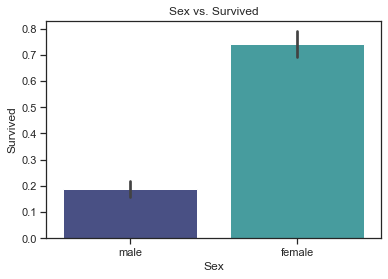

In [9]:
#plotting Sex. Vs. Survived

sns.barplot(x="Sex", y="Survived", data=train, palette = "mako")
plt.title('Sex vs. Survived')
plt.show()

Females overwhelmingly are more likely to have survived.  This is expected as women and children were probably given preference of being seated in lifeboats.

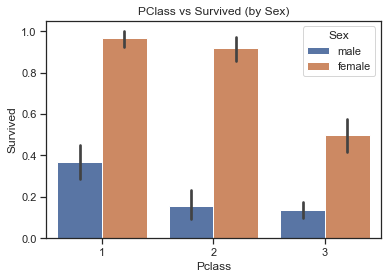

In [10]:
#passenger class and survived relationship by sex

sns.barplot(x='Pclass', y='Survived', hue = 'Sex', data=train)
plt.title('PClass vs Survived (by Sex)')
plt.show()

As expected, those that are of a higher class or first class are more likely to have survived.  They were probably also given preference of given seated in lifeboats.  Within every class, females are always more likely to have survived.

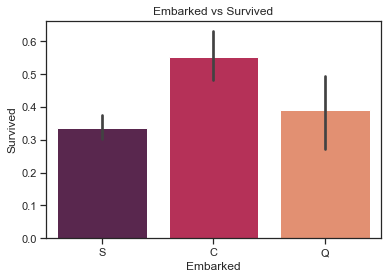

In [11]:
#passenger class and survived relationship by where the passenger originally embarked

sns.barplot(x='Embarked', y='Survived', data=train, palette = "rocket")
plt.title('Embarked vs Survived')
plt.show()


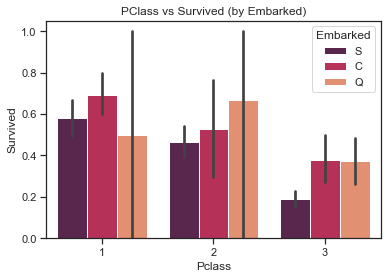

In [12]:
#passenger class and survived relationship by where the passenger originally embarked

sns.barplot(x='Pclass', y='Survived', hue = "Embarked", data=train, palette = "rocket")
plt.title('PClass vs Survived (by Embarked)')
plt.show()


Those that embarked from port C or Cherbourg are more likely to have survived. There does not appear to be a clear cut relationship between class and from where a passenger embarked.  Embarked I think would be a useful variable to keep.

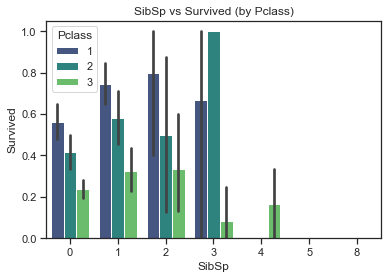

In [13]:
sns.barplot(x='SibSp', y='Survived', hue = 'Pclass', data=train, palette = "viridis")
plt.title('SibSp vs Survived (by Pclass)')
plt.show()

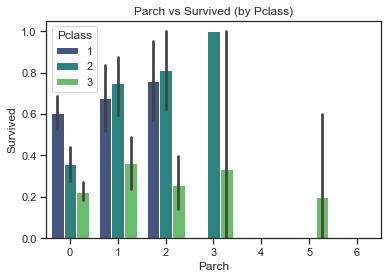

In [14]:
sns.barplot(x='Parch', y='Survived', hue = 'Pclass', data=train, palette = "viridis")
plt.title('Parch vs Survived (by Pclass)')
plt.show()

Those with a smaller family size are usually of the first class.  Those in second class actually appear to have the largest family size overall. Initially I was thinking of removing Parch or SibSp but I will keep both since they are related to a passenger's family size which I do think has some relavance towards whether someone was more likely to survive.

### Taking a Closer Look at Age and Fare 

I think both Age and Fare should be broken down into ranges.  We can look at a few graphs to help to determine the best way to make the bins. 

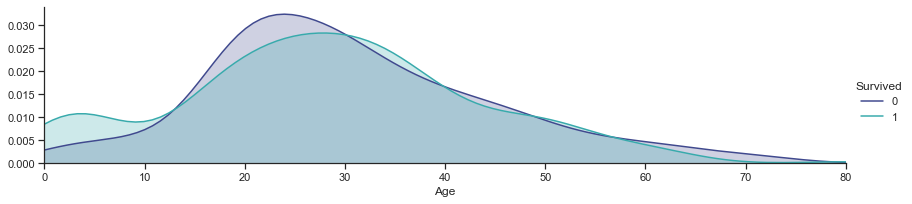

In [15]:
#plot to help developing age ranges when breaking up data for processing
#Age and Survived

p = sns.FacetGrid(train, hue = 'Survived', aspect = 4, palette = "mako")
p.map(sns.kdeplot, 'Age' , shade = True)
p.set(xlim = (0, train['Age'].max()))
p.add_legend()

Passengers between about 17 to 35 appear to be the most likely to have not survived

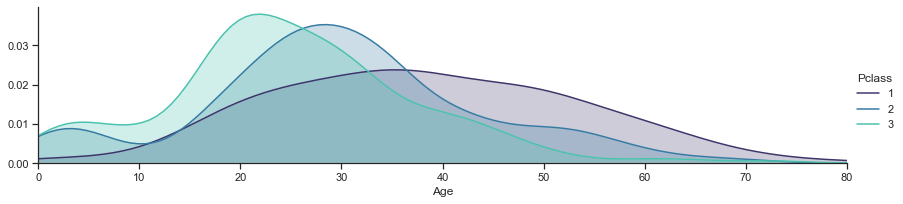

In [16]:
#plot to help developing age ranges when breaking up data for processing
#Age and Class

p3 = sns.FacetGrid(train, hue = 'Pclass', aspect = 4, palette = "mako")
p3.map(sns.kdeplot, 'Age' , shade = True)
p3.set(xlim = (0, train['Age'].max()))
p3.add_legend()

Passengers in first class appear to be older than the other two classes.  Passengers in third class appear to to be the youngest

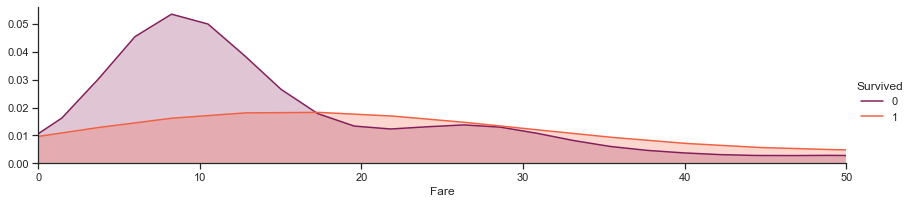

In [17]:
#plot to help developing fare ranges when breaking up data for processing
#Fare and Survived

p4 = sns.FacetGrid(train, hue = 'Survived', aspect = 4, palette = "rocket")
p4.map(sns.kdeplot, 'Fare' , shade = True)
#p4.set(xlim = (0, train['Fare'].max()))
p4.set(xlim = (0, 50))
p4.add_legend()

Passengers that did not survive paid lower fares than those that did survive.  Most of those that did not survive appear to have paid fares less than about 30

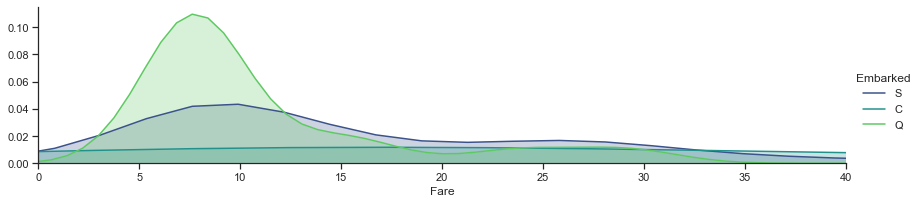

In [18]:
#plot to help developing fare ranges when breaking up data for processing
#Fare and Embarked

p4 = sns.FacetGrid(train, hue = 'Embarked', aspect = 4, palette = "viridis")
p4.map(sns.kdeplot, 'Fare' , shade = True)
#p4.set(xlim = (0, train['Fare'].max()))
p4.set(xlim = (0, 40))
p4.add_legend()

Passengers that embarked from Q or Queenstown paid lower fares and were more likely to have passed away.

### Data Preprocessing

#### Dropping Variables

In [19]:
#dropping variables

#copying datasets
train2 = train.copy()
test2 = test.copy()

#dropping PassengerId, Ticket, Cabin and Name from train set
train2.drop(columns='PassengerId', inplace=True)
train2.drop(columns='Ticket', inplace=True)
train2.drop(columns='Cabin', inplace=True)
train2.drop(columns='Name', inplace=True)


#dropping PassengerId, Ticket, Cabin and Name from test set
test2.drop(columns='Ticket', inplace=True)
test2.drop(columns='Cabin', inplace=True)
test2.drop(columns='Name', inplace=True)

#printing resulting datasets
print(f'Training Data: N rows={len(train2)}, M columns={len(train2.columns)}')
display(train2.head())
print("")
print("")
print(f'Test Data: N rows={len(test2)}, M columns={len(test2.columns)}')
display(test2.head())


Training Data: N rows=891, M columns=8


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S




Test Data: N rows=418, M columns=8


,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,892,3,male,34.5,0,0,7.8292,Q
1,893,3,female,47.0,1,0,7.0000,S
2,894,2,male,62.0,0,0,9.6875,Q
3,895,3,male,27.0,0,0,8.6625,S
4,896,3,female,22.0,1,1,12.2875,S


I chose to drop the PassengerId, Ticket, Cabin, and Name variables from the train dataset.  I believe name would have redundant information that would be in Pclass, sex and age. I dropped the same variables in test, except PassengerId since we will need that information when exporting the resulting prediction file to kaggle.

#### Fixing Null Values in Train and Test Datasets

As we saw earlier, the train dataset has null values in the Age and Embarked variables.  The test dataset has null values in the Age and Fare variables

In [20]:
#Fixing Embarked in train and test datasets

#checking for most common value
train2['Embarked'].describe()

count     889
unique      3
top         S
freq      644
Name: Embarked, dtype: object

In [21]:
#seeing most common value of Embarked is S so subsitute S for the missing value

top_embarked = 'S'
data = [train2, test2]

for dataset in data:
    dataset['Embarked'] = dataset['Embarked'].fillna(top_embarked)

I replaced the null values in the Embarked field with S, the most common port.

In [22]:
#Fixing Fare in test dataset

#replacing fare with mean - only one missing value
test2.Fare = test2.Fare.fillna(train2.Fare.mean())

Since fare only has one missing value, I replaced the null value with the Fare mean.

In [23]:
#age grouped by Pclass and Sex
#checking for the mean and median age

print(train2.groupby(['Sex', 'Pclass'])['Age'].agg(['mean', 'median']).round(1))

               mean  median
Sex    Pclass              
female 1       34.6    35.0
       2       28.7    28.0
       3       21.8    21.5
male   1       41.3    40.0
       2       30.7    30.0
       3       26.5    25.0


In [24]:
#age grouped by Pclass

print(train2.groupby(['Pclass'])['Age'].agg(['mean', 'median']).round(1))

        mean  median
Pclass              
1       38.2    37.0
2       29.9    29.0
3       25.1    24.0


In [25]:
#adapted formula from stack overflow link in references

#formula for fixing null ages; replacing ages with median values based on class and sex
def FixAge(df):
    Age = df[0]
    Pclass = df[1]
    Sex = df[2]
    
    if pd.isnull(Age):
        if Pclass == 1 and Sex == 'male': return 40 
        elif Pclass == 1 and Sex == 'female': return 35
        elif Pclass == 2 and Sex == 'male': return 30
        elif Pclass == 2 and Sex == 'female': return 28
        elif Pclass == 3 and Sex == 'male': return 25
        else: return 22
    else:
        return Age

# replace null values in train dataset
train2['Age'] = train2[['Age' , 'Pclass', 'Sex']].apply(FixAge, axis = 1)

In [26]:
#replace null values in test dataset

test2['Age'] = test2[['Age' , 'Pclass', 'Sex']].apply(FixAge, axis = 1)

I replaced the null age values based on the median age by sex and pclass.

In [27]:
#checking for nulls in train dataset

train2.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [28]:
#checking for nulls in test dataset

test2.isnull().sum()

PassengerId    0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64

In [29]:
#displaying resulting datasets

#printing resulting datasets
print(f'Training Data: N rows={len(train2)}, M columns={len(train2.columns)}')
display(train2.head(20))
print("")
print("")
print(f'Test Data: N rows={len(test2)}, M columns={len(test2.columns)}')
display(test2.head(20))

Training Data: N rows=891, M columns=8


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
5,0,3,male,25.0,0,0,8.4583,Q
6,0,1,male,54.0,0,0,51.8625,S
7,0,3,male,2.0,3,1,21.0750,S
8,1,3,female,27.0,0,2,11.1333,S
9,1,2,female,14.0,1,0,30.0708,C




Test Data: N rows=418, M columns=8


,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,892,3,male,34.5,0,0,7.8292,Q
1,893,3,female,47.0,1,0,7.0000,S
2,894,2,male,62.0,0,0,9.6875,Q
3,895,3,male,27.0,0,0,8.6625,S
4,896,3,female,22.0,1,1,12.2875,S
5,897,3,male,14.0,0,0,9.2250,S
6,898,3,female,30.0,0,0,7.6292,Q
7,899,2,male,26.0,1,1,29.0000,S
8,900,3,female,18.0,0,0,7.2292,C
9,901,3,male,21.0,2,0,24.1500,S


#### Creating Ranges from Fare and Age

In [30]:
#bins for ages

#copying datasets
train3 = train2.copy()
test3 = test2.copy()

#Creating bins and labels for ages
bins_age = [0,11,21,31,41,51,61,100]
age_labels = ['0-10','11-20','21-30','31-40', '41-50', '51-60', '61+']

#applying creating Age_Range
train3['Age_range'] = pd.cut(train3['Age'],bins = bins_age, labels = age_labels)
test3['Age_range'] = pd.cut(test3['Age'],bins = bins_age, labels = age_labels)

In [31]:
display(test3.head())

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Age_range
0,892,3,male,34.5,0,0,7.8292,Q,31-40
1,893,3,female,47.0,1,0,7.0000,S,41-50
2,894,2,male,62.0,0,0,9.6875,Q,61+
3,895,3,male,27.0,0,0,8.6625,S,21-30
4,896,3,female,22.0,1,1,12.2875,S,21-30


The age range bins are similar to the ranges on the age graphs. I created a column for the range values and will drop the original Age column at a later step

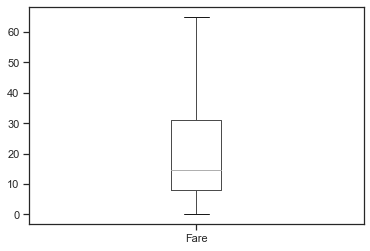

In [32]:
#visualizing fare median and ouliers

train3.boxplot(column =['Fare'], grid = False, showfliers=False) 

In [33]:
#bins for Fare
bins_fare = [0,16,31,600]
fare_labels = ['low','medium','high']

#applying bins to test and train datasets
train3['Fare_range'] = pd.cut(train3['Fare'],bins = bins_fare, labels = fare_labels)
test3['Fare_range'] = pd.cut(test3['Fare'],bins = bins_fare, labels = fare_labels)

display(train3.head())

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Age_range,Fare_range
0,0,3,male,22.0,1,0,7.2500,S,21-30,low
1,1,1,female,38.0,1,0,71.2833,C,31-40,high
2,1,3,female,26.0,0,0,7.9250,S,21-30,low
3,1,1,female,35.0,1,0,53.1000,S,31-40,high
4,0,3,male,35.0,0,0,8.0500,S,31-40,low


Similar to the age bins, I categorized the Fares as low, medium, or high.  The low, medium, or high values were based on the box plot above. I approximated 0-15 as low fare, 16-30 as medium fare, and 31+ as high fare. A separate column was created for the fare range

In [34]:
#dropping redundant age and fare columns from train and test datasets

train3.drop(columns='Age', inplace=True)
train3.drop(columns='Fare', inplace=True)

test3.drop(columns='Age', inplace=True)
test3.drop(columns='Fare', inplace=True)


In [35]:
#resulting dataset
display(test3.head(20))

,PassengerId,Pclass,Sex,SibSp,Parch,Embarked,Age_range,Fare_range
0,892,3,male,0,0,Q,31-40,low
1,893,3,female,1,0,S,41-50,low
2,894,2,male,0,0,Q,61+,low
3,895,3,male,0,0,S,21-30,low
4,896,3,female,1,1,S,21-30,low
5,897,3,male,0,0,S,11-20,low
6,898,3,female,0,0,Q,21-30,low
7,899,2,male,1,1,S,21-30,medium
8,900,3,female,0,0,C,11-20,low
9,901,3,male,2,0,S,11-20,medium


I dropped the original Age and Fare Columns as they contain redundant information

#### One-hot Encoding Sex, Embarked, Age_Range, and Fare_Range

In [36]:
#one hot coding formula from module 3 notebook
# pandas get_dummies function is one-hot-encoder
def encode_onehot(_df, f):
    _df2 = pd.get_dummies(_df[f], prefix='', prefix_sep='').max(level=0, axis=1).add_prefix(f+' - ')
    df4 = pd.concat([_df, _df2], axis=1)
    df4 = df4.drop([f], axis=1)
    return df4

In [37]:
# Appling the onehot-encoding method to Sex, Embarked, Age_Range, and Fare_Range
onehot = ['Sex', 'Embarked', 'Age_range', 'Fare_range']

for x in onehot:
    if x in train3:
        train3 = encode_onehot(train3, x)
        test3 = encode_onehot(test3, x)


In [38]:
#displaying resulting datasets

#printing resulting datasets
print(f'Training Data: N rows={len(train3)}, M columns={len(train3.columns)}')
display(train3.head())
print("")
print("")
print(f'Test Data: N rows={len(test3)}, M columns={len(test3.columns)}')
display(test3.head())

Training Data: N rows=891, M columns=19


,Survived,Pclass,SibSp,Parch,Sex - female,Sex - male,Embarked - C,Embarked - Q,Embarked - S,Age_range - 0-10,Age_range - 11-20,Age_range - 21-30,Age_range - 31-40,Age_range - 41-50,Age_range - 51-60,Age_range - 61+,Fare_range - low,Fare_range - medium,Fare_range - high
0,0,3,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0
1,1,1,1,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,1
2,1,3,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0
3,1,1,1,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1
4,0,3,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0




Test Data: N rows=418, M columns=19


,PassengerId,Pclass,SibSp,Parch,Sex - female,Sex - male,Embarked - C,Embarked - Q,Embarked - S,Age_range - 0-10,Age_range - 11-20,Age_range - 21-30,Age_range - 31-40,Age_range - 41-50,Age_range - 51-60,Age_range - 61+,Fare_range - low,Fare_range - medium,Fare_range - high
0,892,3,0,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0,0
1,893,3,1,0,1,0,0,0,1,0,0,0,0,1,0,0,1,0,0
2,894,2,0,0,0,1,0,1,0,0,0,0,0,0,0,1,1,0,0
3,895,3,0,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0
4,896,3,1,1,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0


After one-hot encoding the Embarked, Sex, Age_range, and Fare_range variables, we have 19 columns.

### Building Models and Comparing Performance

In [39]:
#building multiple models for comparison

models = ["Logistic_Regression", "SVM_RBF", "SVM_Linear", "Decision_Tree", 
                    "Random_Forest", "Gaussian_NB", "K_Nearest", "Neural_Network"]

classifiers = [
    LogisticRegression(),
    svm.SVC(kernel="rbf"),
    svm.SVC(kernel="linear"),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    GaussianNB(),
    KNeighborsClassifier(),
    MLPClassifier(max_iter=1000)]

In [40]:
# splitting into training and testing set
#X = train3.loc[:, train3.columns != 'Survived'].values
#y = test3.loc[:, test3.columns == 'Survived'].values.ravel()

X_train = train3.loc[:, train3.columns != 'Survived'].values
y_train = train3.loc[:, train3.columns == 'Survived'].values.ravel()
X_test  = test3.loc[:, test3.columns != 'PassengerId'].values.copy()


In [41]:
#checking resulting shape of testing and training sets

X_train.shape, y_train.shape, X_test.shape

((891, 18), (891,), (418, 18))

In [42]:
%%time

#10-fold cross validation 
crossvalidation = KFold(n_splits=10, shuffle=False, random_state=None)

#applying 10-fold cross validation to all models
accuracies = []
for model, clf in zip(models, classifiers):
    model_ = clf.fit(X_train, y_train)
    accuracy = cross_val_score(model_, X_train, y_train, scoring='accuracy', cv=crossvalidation, n_jobs=-1)
    accuracies.append(np.mean(accuracy))

#scores

df = pd.DataFrame()
df['model'] = models
df['accuracy'] = accuracies
df

Wall time: 12.5 s


,model,accuracy
0,Logistic_Regression,0.793521
1,SVM_RBF,0.827166
2,SVM_Linear,0.788964
3,Decision_Tree,0.793546
4,Random_Forest,0.792447
5,Gaussian_NB,0.776667
6,K_Nearest,0.782372
7,Neural_Network,0.809226


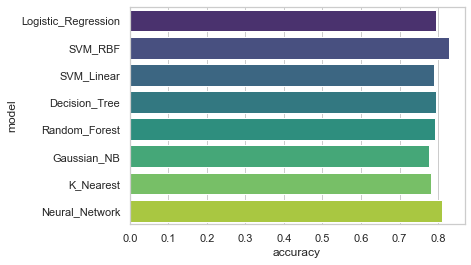

In [43]:
sns.set(style="whitegrid")
ax = sns.barplot(y="model", x="accuracy", data=df, palette=("viridis"))

After running 10 fold cross validation on multiple models, the SVM RBF, Neural Networks, Random Forest and Logistic Regression models appear to have the best performance.  I did not do any other comparisons of the model since Kaggle will be providing the final evaluation

***
## Problem 2
*Submit your predictions to Kaggle for the test dataset and report your accuracy in
your submission. (You will need an account at Kaggle – use a dummy email address to
protect your school email address, etc.)*

In [44]:
#extracting passengerid field that will be needed for the csv submission files
test3_ids = pd.DataFrame(test3['PassengerId'])

In [45]:
# generating random forest predictions 
random_forest = RandomForestClassifier()
random_forest.fit(X_train, y_train)
y_pred_rf = random_forest.predict(X_test)

In [46]:
# generating logistic regression predictions
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred_lr = logreg.predict(X_test)

In [47]:
#generating SVC Rbf predictions
svc = svm.SVC(kernel="rbf")
svc.fit(X_train, y_train)
y_pred_svc = svc.predict(X_test)

In [48]:
#generating neural network predictions
nn =  MLPClassifier(max_iter=1000)
nn.fit(X_train, y_train)
y_pred_nn = nn.predict(X_test)

In [49]:
#generating output prediction file for submission to kaggle - formula from homework 5 description

def save_preds(_fn, _y_pred, _df):
    import csv
    with open(_fn, 'w') as fout:
        writer = csv.writer(fout, delimiter=',', lineterminator='\n')
        writer.writerow(['Survived', 'PassengerId'])
        for y, passengerId in zip(_y_pred, _df['PassengerId']):
            writer.writerow([y, passengerId])



In [50]:
#generating output prediction file for submission to kaggle

#random forest predictions
save_preds('predictions1_sparikh.csv', y_pred_rf, test3_ids)

In [51]:
#generating output prediction file for submission to kaggle

#logistic regression predictions
save_preds('predictions2_sparikh.csv', y_pred_lr, test3_ids)

In [52]:
#generating output prediction file for submission to kaggle

#SVC_RBF predictions
save_preds('predictions3_sparikh.csv', y_pred_svc, test3_ids)

In [53]:
#generating output prediction file for submission to kaggle

#Neural Network predictions
save_preds('predictions4_sparikh.csv', y_pred_nn, test3_ids)

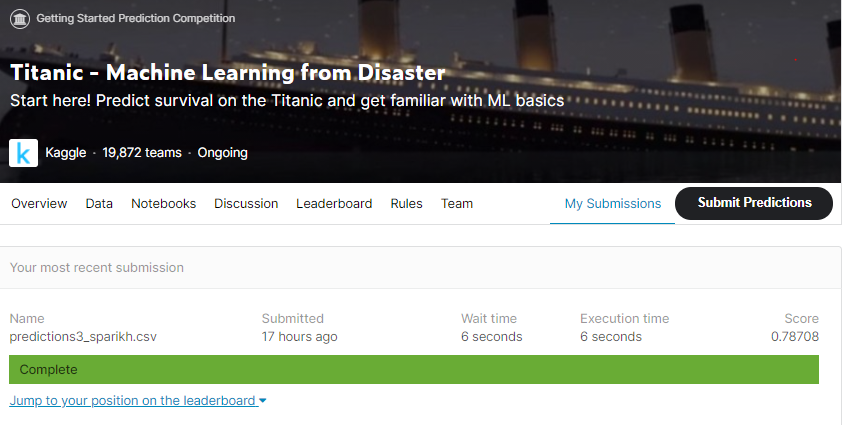

The SVM RBF model had the best performance with a score of 0.78708 on kaggle.  Next, the logistic regression model performaed at 0.76076, the neural network model performed at 0.75119, and lastly the random forest performed at 0.74641.

***
## References

https://www.kaggle.com/alexisbcook/titanic-tutorial

https://towardsdatascience.com/predicting-the-survival-of-titanic-passengers-30870ccc7e8

https://www.kaggle.com/kenjee/titanic-project-example

https://humansofdata.atlan.com/2016/07/machine-learning-python/

https://stackoverflow.com/questions/61544957/filling-missing-values-with-groupby-object-on-pandas-titanic-dataset

https://www.codementor.io/@innat_2k14/titanic-kaggle-machine-learning-from-disaster-part-1-10gbvqzguc

https://stackoverflow.com/questions/22028064/matplotlib-boxplot-without-outliers

https://www.analyticsvidhya.com/blog/2020/10/getting-started-with-feature-engineering/

https://seaborn.pydata.org/tutorial/color_palettes.html

https://machinelearningmastery.com/how-to-configure-k-fold-cross-validation/

https://www.datacamp.com/community/tutorials/seaborn-python-tutorial

Raschka, Sebastian. Python Machine Learning: Machine Learning and Deep Learning with Python, scikit-learn, and TensorFlow 2, 3rd Edition (p. 46). Packt Publishing. Kindle Edition. 
